In [1]:
import csv
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

/Users/shenstella/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Load the data

In [2]:
data = pd.read_csv('data.csv', parse_dates=['Intake-DateTime', 'Outcome-DateTime'])
data.dtypes

AnimalID                         object
ID                               object
Breed                            object
Color                            object
Gender                           object
Name                             object
Intake-DateTime          datetime64[ns]
Intake-Type                      object
Intake-Condition                 object
Intake-Age(days)                  int64
Date-Of-Birth                    object
Outcome-DateTime         datetime64[ns]
Outcome-Type                     object
Outcome-Subtype                  object
Outcome-Age(days)                 int64
Age                              object
IsAdopted                          bool
Category                         object
Intelligence-Ranking              int64
Intelligence-Category            object
Size-Category                    object
Longevity                       float64
Total-Cost($)                     int64
Purchase-Cost($)                  int64
Food-Cost($)                      int64


### Prepare the data, replace object data with numerical values

In [3]:
X = data.drop('IsAdopted', axis=1)
y = data['IsAdopted']

X = data.iloc[:,:].drop(columns=["IsAdopted", "AnimalID", "ID", "Intake-DateTime","Color", "Breed","Outcome-DateTime", "Intelligence-Category", "Date-Of-Birth","Name", "Intake-Condition", "Category","Outcome-Subtype", "Intake-Age(days)", "Cost-Category", "Outcome-Type", "Intake-Type", "Outcome-Age(days)"])
X


,Gender,Age,Intelligence-Ranking,Size-Category,Longevity,Total-Cost($),Purchase-Cost($),Food-Cost($)
0,Male,Adult,27,Large,9.00,18062,1725,5679
1,Male,Senior,27,Large,9.00,18062,1725,5679
2,Male,Senior,27,Large,9.00,18062,1725,5679
3,Male,Senior,6,Small,12.53,17469,465,3698
4,Female,Senior,7,Medium,12.04,18422,810,4819
...,...,...,...,...,...,...,...,...
85791,Female,Senior,67,Small,16.50,22640,588,4594
85792,Female,Senior,67,Small,16.50,22640,588,4594
85793,Female,Senior,59,Small,12.25,16073,650,2410
85794,Female,Baby,7,Medium,12.04,18422,810,4819


In [4]:
# Here we replace all the descriptive lable into numerical lable
gender = X.groupby('Gender').size()
X['Gender'].replace(['Female','Male'], [0,1], inplace=True)
SizeCategory = X.groupby('Size-Category').size()
X['Size-Category'].replace(['Large','Medium','Small'], [3,2,1], inplace=True)
Age = X.groupby('Age').size()
X['Age'].replace(['Baby','Young','Adult', 'Senior'], [1,2,3,4], inplace=True)
X


,Gender,Age,Intelligence-Ranking,Size-Category,Longevity,Total-Cost($),Purchase-Cost($),Food-Cost($)
0,1,3,27,3,9.00,18062,1725,5679
1,1,4,27,3,9.00,18062,1725,5679
2,1,4,27,3,9.00,18062,1725,5679
3,1,4,6,1,12.53,17469,465,3698
4,0,4,7,2,12.04,18422,810,4819
...,...,...,...,...,...,...,...,...
85791,0,4,67,1,16.50,22640,588,4594
85792,0,4,67,1,16.50,22640,588,4594
85793,0,4,59,1,12.25,16073,650,2410
85794,0,1,7,2,12.04,18422,810,4819


In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# kNN is sensitive to the scale of features, so it's a good idea to normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
# Choose the number of neighbors (you can experiment with different values)
n_neighbors = 3

# Create kNN classifier
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# Train the model
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)


In [8]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 0.5501748251748252
Classification Report:
               precision    recall  f1-score   support

       False       0.56      0.54      0.55      8742
        True       0.54      0.56      0.55      8418

    accuracy                           0.55     17160
   macro avg       0.55      0.55      0.55     17160
weighted avg       0.55      0.55      0.55     17160



### Using Cross Validation to Get the Best Value of k

In [9]:
from sklearn.model_selection import cross_val_score
k_values = [i for i in range (1,31)]
scores = []

X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))
    

### We can plot the results with the following code

Text(0, 0.5, 'Accuracy Score')

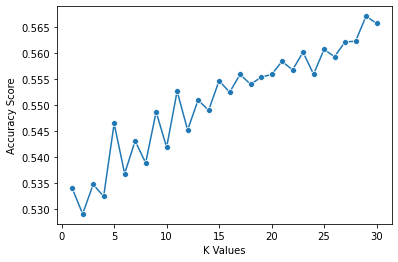

In [10]:
import seaborn as sns
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")


### Since we know know what could be the best K value, we update the model with the best K

In [11]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=29)

In [12]:
y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 0.5979020979020979
Classification Report:
               precision    recall  f1-score   support

       False       0.61      0.59      0.60      8742
        True       0.59      0.61      0.60      8418

    accuracy                           0.60     17160
   macro avg       0.60      0.60      0.60     17160
weighted avg       0.60      0.60      0.60     17160



### evaluate with accuracy, precision, and recall

In [13]:
from sklearn.metrics import precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.5979020979020979
Precision: 0.5873417721518988
Recall: 0.6063197909242101


In [14]:
y_pred = knn.predict(X_test_scaled)


### Use each feature alone - to fit a KNN model on the training set.

Evaluation for the feature:  Gender
Accuracy: 0.47884615384615387
Precision: 0.47140834331772136
Recall: 0.5141363744357329
Evaluation for the feature:  Age
Accuracy: 0.5372377622377622
Precision: 0.5156137479541735
Recall: 0.9356141601330482
Evaluation for the feature:  Intelligence-Ranking
Accuracy: 0.5288461538461539
Precision: 0.5202974521516518
Recall: 0.5070087906866239
Evaluation for the feature:  Size-Category
Accuracy: 0.5238927738927739
Precision: 0.5378279438682123
Recall: 0.20943216916132099
Evaluation for the feature:  Longevity
Accuracy: 0.5286130536130537
Precision: 0.5237065859633953
Recall: 0.43169398907103823
Evaluation for the feature:  Total-Cost($)
Accuracy: 0.5336247086247087
Precision: 0.5287038317886291
Recall: 0.4540270848182466
Evaluation for the feature:  Purchase-Cost($)
Accuracy: 0.5228438228438228
Precision: 0.5114564654313608
Recall: 0.6098835827987645
Evaluation for the feature:  Food-Cost($)
Accuracy: 0.5308857808857809
Precision: 0.5313886045718185
Rec

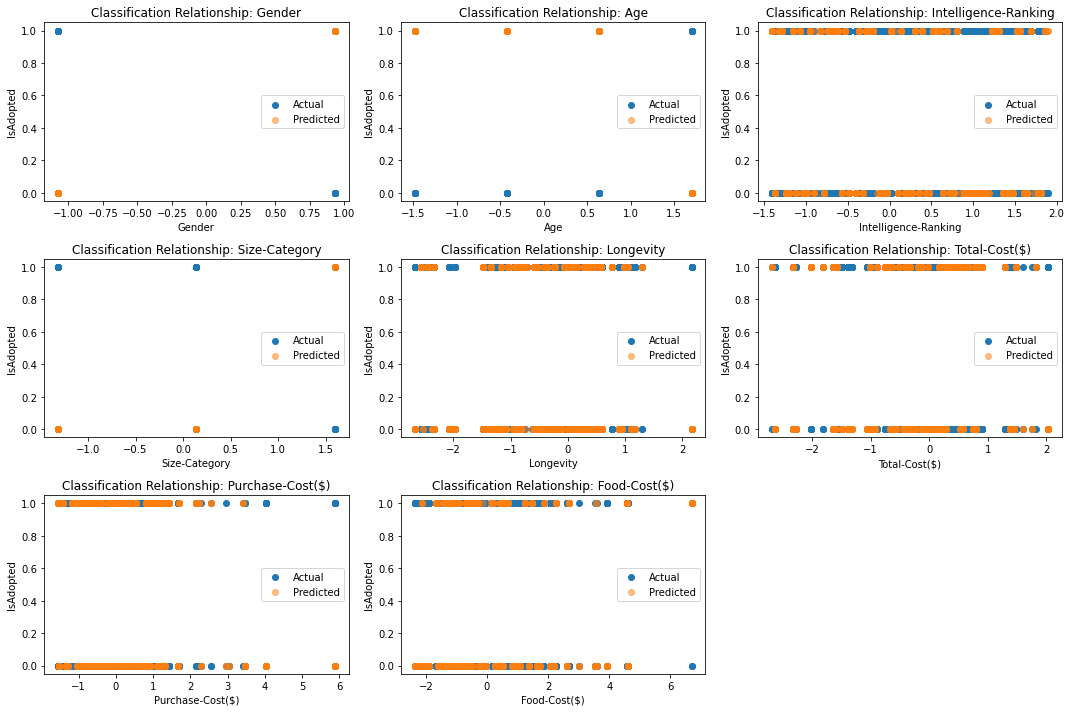

In [17]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Feature names
names = ["Gender", "Age", "Intelligence-Ranking", "Size-Category", "Longevity", "Total-Cost($)", "Purchase-Cost($)", "Food-Cost($)"]

plt.figure(figsize=(15, 10))

# Iterate over each feature
for i in range(len(names)):
    plt.subplot(3, 3, i + 1)
    
    # Extract the current feature
    x = X[:, i].reshape(-1, 1)
    
    # Split the data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    # Create KNN classifier
    knn = KNeighborsClassifier(n_neighbors=3)
    
    # Train the model
    knn.fit(x_train, y_train)
    
    y_pred = knn.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    print("Evaluation for the feature: ", names[i])
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    
    # Visualize decision boundary
    plt.scatter(x_test, y_test, label='Actual')
    plt.scatter(x_test, knn.predict(x_test), label='Predicted', marker='o', alpha=0.5)
    
    plt.title(f"Classification Relationship: {names[i]}")
    plt.xlabel(names[i])
    plt.ylabel('IsAdopted')
    plt.legend()

plt.tight_layout()
plt.show()


### Visualization

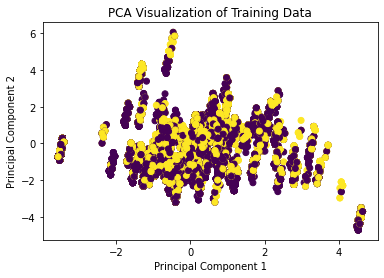

In [18]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce the data to 2 dimensions (you can adjust this based on the number of features)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Plot the data points in 2D space with color-coded classes
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.title('PCA Visualization of Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### Conclusion & Discussion

From the Nearest Neighbor (kNN) Classifier model, we can see:
1. Age, Gender, Size, Total-Cost do not affect if the pet will be adopted.
2. Total-cost, Intelligence level and Food-Cost have a high influence on adoption. 
3. The model performs much better with all features rather than any individual ones. This quite makes sense since the model is better trained for classification.
4. The PCA plot suggests that adoption is a complex decision that can't be easily predicted by one or two features alone.